#### Criando um dataset

In [1]:
import numpy as np

def generate_dataset(size, classes=2, noise=0.5):
    
    # Generate random datapoints
    labels = np.random.randint(0, classes, size)
    labels_err = np.random.random(size) * 0.25
    
    x = (np.random.rand(size)-labels_err  + labels) / classes
    y = x + np.random.rand(size) * noise
    
    
    # Reshape data in order to merge them
    #x = x.reshape(size, 1)
    #y = y.reshape(size, 1)
    #labels = labels.reshape(size, 1)
    # Merge the data
    #data = np.hstack((x, y, labels))
    
    return x, y, labels

In [2]:
X, Y, Label = generate_dataset(250, classes=2, noise=2.5)
data = np.hstack((X.reshape(len(X),1), Y.reshape(len(Y),1)))

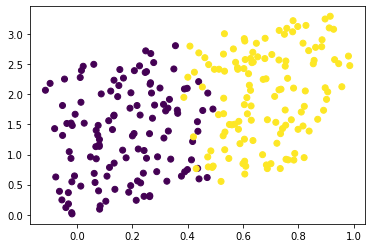

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, c=Label)
plt.show()

## Regressão Logistica

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data,Label, test_size=0.25)

In [5]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)

print(lr.score(X_test, Y_test))

0.9682539682539683


In [6]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, data,Label, scoring='accuracy', cv=10)
scores

array([1.  , 1.  , 0.92, 0.92, 0.88, 1.  , 0.96, 1.  , 0.88, 0.8 ])

In [7]:
print(scores.mean())
print(scores.std())

0.9360000000000002
0.06499230723708767


In [8]:
print(lr.intercept_)
print(lr.coef_)

[-3.39409327]
[[5.77259924 0.59006505]]


#### usando o sklearn para criar um dataset

In [9]:
from sklearn.datasets import make_classification

nb_samples = 500
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)


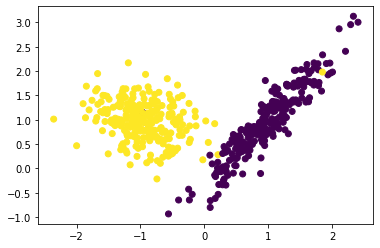

In [10]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [11]:
model = LogisticRegression()
# fit the model
model.fit(X, Y)
print(lr.score(X_test, Y_test))

0.9682539682539683


In [12]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, Y, scoring='accuracy', cv=10)
scores

array([1.  , 0.96, 1.  , 1.  , 0.98, 1.  , 0.98, 1.  , 1.  , 0.96])

In [13]:
print(scores.mean())
print(scores.std())

0.9879999999999999
0.016000000000000014


In [14]:
print(lr.intercept_)
print(lr.coef_)

[-3.39409327]
[[5.77259924 0.59006505]]


#### desenhando a separação

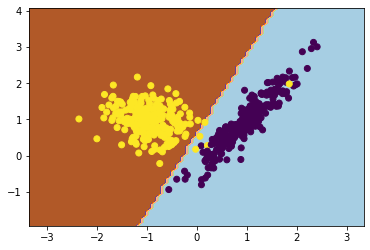

In [17]:
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from numpy import where

# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1


# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)


# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)


# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))


# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

# make predictions for the grid
yhat = model.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)


# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

plt.scatter(X[:, 0], X[:, 1], c=Y)

# show the plot
plt.show()

### Gradiente Descentente Estocástico

In [18]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss='perceptron', learning_rate='optimal')

cross_val_score(sgd, X, Y, scoring='accuracy', cv=10).mean()

0.9800000000000001

In [19]:
from sklearn.linear_model import Perceptron

perc = Perceptron()

cross_val_score(perc, X, Y, scoring='accuracy', cv=10).mean()

0.986

## Passive-aggressive algorithms

In [20]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

iris = load_iris()

ss = StandardScaler()

X = ss.fit_transform(iris['data'])
Y = iris['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1000)

nb_initial_samples = int(X_train.shape[0] / 1.5)

In [21]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier(C=0.05, loss='squared_hinge', max_iter=2000, random_state=1000)
pac.fit(X_train[0:nb_initial_samples], Y_train[0:nb_initial_samples])

PassiveAggressiveClassifier(C=0.05, loss='squared_hinge', max_iter=2000,
                            random_state=1000)

In [22]:
import numpy as np

validation_accuracies = []
print(nb_initial_samples)
print(X_train.shape[0])
for (x, y) in zip(X_train[nb_initial_samples:], Y_train[nb_initial_samples:]):
    pac.partial_fit(x.reshape(1, -1), y.ravel(), classes=np.unique(iris['target']))
    validation_accuracies.append(pac.score(X_test, Y_test))

70
105


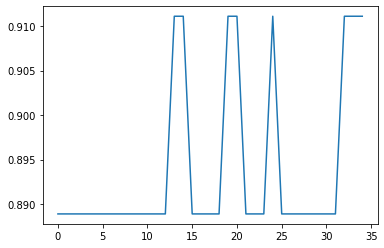

In [23]:
plt.plot(validation_accuracies)
plt.show()

## Encontrar hiperparametros ótimos usando o Grid Search

In [24]:
import multiprocessing

from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV

iris = load_iris()

param_grid = [
   { 
      'penalty': [ 'l1', 'l2' ],
      'C': [ 0.5, 1.0, 1.5, 1.8, 2.0, 2.5],
       'solver':['liblinear'],
       'max_iter':[2000]
   }
]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
   scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())




In [25]:
gs.fit(iris.data, iris.target)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=4,
             param_grid=[{'C': [0.5, 1.0, 1.5, 1.8, 2.0, 2.5],
                          'max_iter': [2000], 'penalty': ['l1', 'l2'],
                          'solver': ['liblinear']}],
             scoring='accuracy')

In [26]:
print(gs.best_estimator_)
print(cross_val_score(gs.best_estimator_, iris.data, iris.target, scoring='accuracy', cv=10).mean())

LogisticRegression(C=1.5, max_iter=2000, penalty='l1', solver='liblinear')
0.9666666666666668


#### vamos tentar com um perceptron?

In [27]:
import multiprocessing

from sklearn.model_selection import GridSearchCV

param_grid = [
   { 
       'penalty': [ 'l1', 'l2', 'elasticnet' ],
       'alpha': [ 1e-5, 1e-4, 5e-4, 1e-3, 2.3e-3, 5e-3, 1e-2],
       'l1_ratio': [0.01, 0.05, 0.1, 0.15, 0.25, 0.35, 0.5, 0.75, 0.8]
   }
]

sgd = SGDClassifier(loss='perceptron', learning_rate='optimal')
gs = GridSearchCV(estimator=sgd, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

gs.fit(iris.data, iris.target)

print(gs.best_estimator_)
print(gs.best_score_)

SGDClassifier(alpha=0.0023, l1_ratio=0.8, loss='perceptron',
              penalty='elasticnet')
0.9800000000000001


## Métricas de Classificação

In [28]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

nb_samples = 500

X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0,
 n_clusters_per_class=1, random_state=1000)


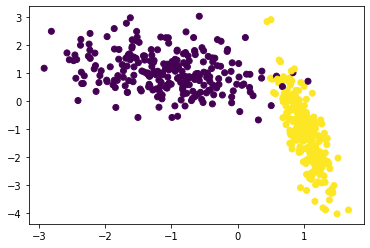

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1000)


lr = LogisticRegression()
lr.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score

print(accuracy_score(Y_test, lr.predict(X_test)))


0.968


#### desenhando a separação

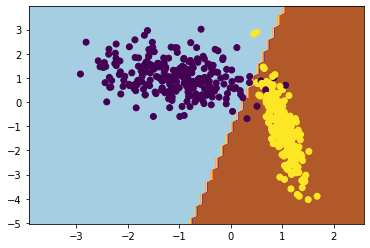

In [31]:
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from numpy import where

# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1


# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)


# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)


# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))


# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

# make predictions for the grid
yhat = lr.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)


# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

plt.scatter(X[:, 0], X[:, 1], c=Y)

# show the plot
plt.show()

#### Perda Zero-um

In [32]:
from sklearn.metrics import zero_one_loss

print(zero_one_loss(Y_test, lr.predict(X_test)))

print(zero_one_loss(Y_test, lr.predict(X_test), normalize=False))


0.03200000000000003
4


#### Coeficiente de similaridade de Jaccard

In [119]:
from sklearn.metrics import jaccard_score

print(jaccard_score(Y_test, lr.predict(X_test)))


0.9384615384615385


### Matriz de Confusão

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1000)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression()

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=Y_test, y_pred=lr.predict(X_test))

print(cm[::-1, ::-1])

[[61  1]
 [ 3 60]]


In [35]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def plot_confusion_matrix(Y_test, Y_pred, targets):
    cmatrix = confusion_matrix(y_true=Y_test, y_pred=Y_pred)
    cm_fig, cm_ax = plt.subplots(figsize=(8.0, 8.0))
    cm_ax.matshow(cmatrix, cmap=cm.GnBu)


    cm_ax.set_xticklabels([''] + targets)
    cm_ax.set_yticklabels([''] + targets)

    for i in range(len(targets)):
        for j in range(len(targets)):
            cm_ax.text(x=j, y=i, s=cmatrix[i, j], va='center', ha='center', size='x-large')

    plt.title('Matriz de Confusão')
    plt.show()

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


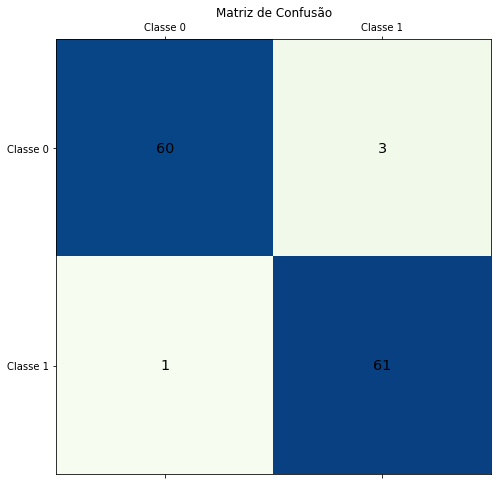

In [36]:
plot_confusion_matrix(Y_test, lr.predict(X_test), list(['Classe 0','Classe 1']))

## Database Wine

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


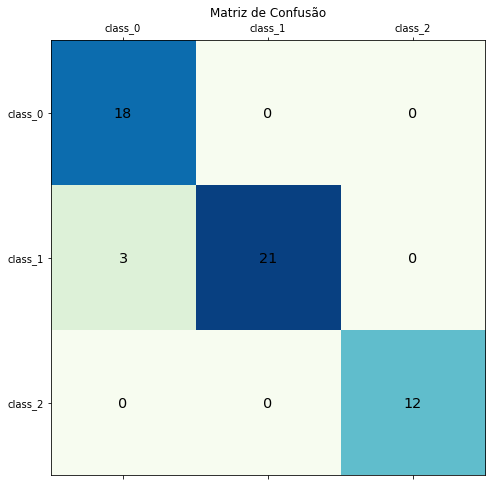

0.9444444444444444


In [37]:
from sklearn.metrics import confusion_matrix

from sklearn.datasets import load_wine
from sklearn.metrics import accuracy_score

wine = load_wine()

X_train, X_test, Y_train, Y_test = train_test_split(wine["data"], wine["target"], test_size=0.3)

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, Y_train)
    
plot_confusion_matrix(lr.predict(X_test), Y_test, list(wine['target_names']))    
print(accuracy_score(Y_test, lr.predict(X_test)))

In [38]:
import numpy as np
import copy as cp
from typing import Tuple 
from sklearn.model_selection import StratifiedKFold, cross_val_score
    
def cross_val_predict(model, kfold : StratifiedKFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X,y):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba    

D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
D:\Backup\Dropbox\Jupyter\venv\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()


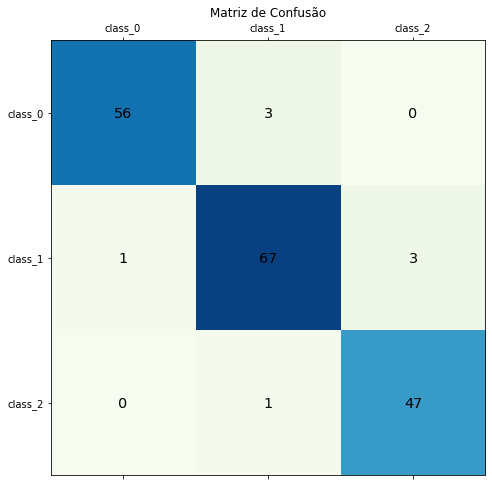

0.9555555555555555


In [39]:
# Validação cruzada estratificada K Fold (ou K-Fold estratificado)
kfold = StratifiedKFold(n_splits=10,  shuffle=False)

cv_results = cross_val_score(lr, wine["data"], wine["target"], scoring='accuracy', cv=kfold)

actual_classes, predicted_classes, _ = cross_val_predict(lr, kfold, wine["data"], wine["target"])

plot_confusion_matrix(actual_classes, predicted_classes, list(wine['target_names']))
print(cv_results.mean())

In [40]:
from sklearn.metrics import classification_report

print(classification_report(actual_classes, predicted_classes))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        59
           1       0.94      0.94      0.94        71
           2       0.94      0.98      0.96        48

    accuracy                           0.96       178
   macro avg       0.96      0.96      0.96       178
weighted avg       0.96      0.96      0.96       178



### Previsão e Recall

In [41]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#print("Precision Score : ",precision_score(Y_test,lr.predict(X_test),average='micro'))
#print("Recall Score :" , recall_score(Y_test, lr.predict(X_test), average='micro') )

print("CV Precision Score : ",precision_score(actual_classes, predicted_classes, average='micro'))
print("CV Recall Score :" , recall_score(actual_classes, predicted_classes, average='micro') )


CV Precision Score :  0.9550561797752809
CV Recall Score : 0.9550561797752809


### Score FBeta

In [42]:
from sklearn.metrics import fbeta_score

#print(fbeta_score(Y_test, lr.predict(X_test), beta=1, average='micro'))
#print(fbeta_score(Y_test, lr.predict(X_test), beta=0.75, average='micro'))
#print(fbeta_score(Y_test, lr.predict(X_test), beta=1.25, average='micro'))

print(fbeta_score(actual_classes, predicted_classes, beta=1, average='micro'))
print(fbeta_score(actual_classes, predicted_classes, beta=0.75, average='micro'))
print(fbeta_score(actual_classes, predicted_classes, beta=1.25, average='micro'))

0.9550561797752809
0.955056179775281
0.9550561797752809


### Score Cohen Kappa

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1000)

lr = LogisticRegression()
lr.fit(X_train, Y_train)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=Y_test, y_pred=lr.predict(X_test))

print(cm[::-1, ::-1])

[[61  1]
 [ 3 60]]


In [44]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("Precision Score : ",precision_score(Y_test,lr.predict(X_test),average='micro'))
print("Recall Score :" , recall_score(Y_test, lr.predict(X_test), average='micro') )

Precision Score :  0.968
Recall Score : 0.968


In [45]:
from sklearn.metrics import fbeta_score

print(fbeta_score(Y_test, lr.predict(X_test), beta=1, average='micro'))
print(fbeta_score(Y_test, lr.predict(X_test), beta=0.75, average='micro'))
print(fbeta_score(Y_test, lr.predict(X_test), beta=1.25, average='micro'))

0.968
0.968
0.9680000000000001


In [46]:
from sklearn.metrics import cohen_kappa_score

print(cohen_kappa_score(Y_test, lr.predict(X_test)))

0.9360122856411569


### Sumário de Classificação

In [47]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        63
           1       0.95      0.98      0.97        62

    accuracy                           0.97       125
   macro avg       0.97      0.97      0.97       125
weighted avg       0.97      0.97      0.97       125



## Curva de Aprendizado

In [50]:
import numpy as np

from sklearn.datasets import load_wine
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle

wine = load_wine()

X, Y = shuffle(wine['data'], wine['target'])

tsize, training_score, test_score = learning_curve(LogisticRegression(solver='liblinear'), X, Y, cv=20, random_state=1000)

avg_tr_scores = np.mean(training_score, axis=1)
avg_test_scores = np.mean(test_score, axis=1)

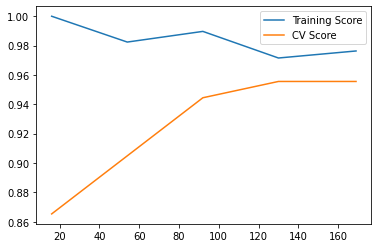

In [51]:
plt.plot(tsize,avg_tr_scores,label='Training Score')
plt.plot(tsize,avg_test_scores,label='CV Score')
plt.legend()
plt.show()

In [52]:
X, Y = (wine['data'], wine['target'])

tsize, training_score, test_score = learning_curve(LogisticRegression(solver='liblinear'), X, Y, cv=kfold, random_state=1000)

avg_tr_scores = np.mean(training_score, axis=1)
avg_test_scores = np.mean(test_score, axis=1)

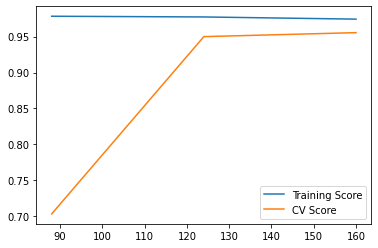

In [53]:
plt.plot(tsize,avg_tr_scores,label='Training Score')
plt.plot(tsize,avg_test_scores,label='CV Score')
plt.legend()
plt.show()

##  Curva Característica de Operação do Receptor  (Curva ROC)

In [56]:
from sklearn.datasets import make_classification

nb_samples = 500
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, Y_train)

Y_scores = lr.decision_function(X_test)


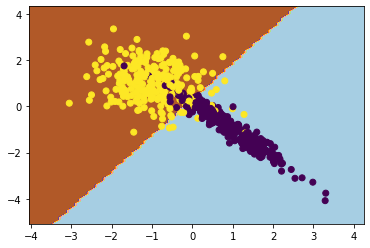

In [57]:
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from numpy import where

# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1


# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)


# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)


# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))


# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))

# make predictions for the grid
yhat = lr.predict(grid)

# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)


# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

plt.scatter(X[:, 0], X[:, 1], c=Y)

# show the plot
plt.show()

In [58]:
print(lr.score(X_test, Y_test))

0.928


In [59]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_test, Y_scores)

In [60]:
from sklearn.metrics import auc

print(auc(fpr, tpr))

0.9815573770491803


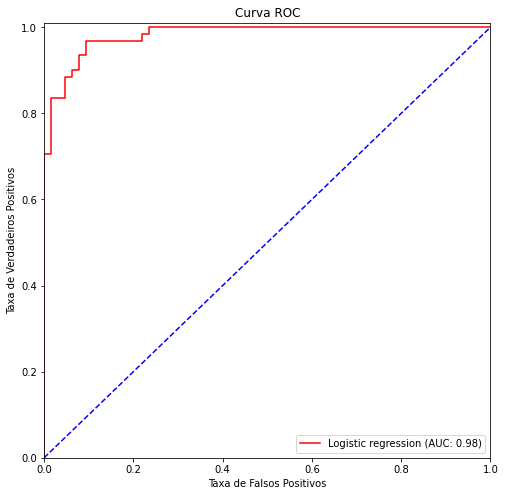

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='red', label='Logistic regression (AUC: %.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend(loc="lower right")

plt.show()